In [1]:
import matplotlib.pyplot as plt
import copy
import cv2

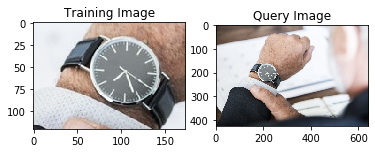

In [2]:
image1 = cv2.imread('../images/watcher.jpg')
image2 = cv2.imread('../images/watch.jpeg')

train_img = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
query_img = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(train_img)
plt.title('Training Image')
plt.subplot(122)
plt.imshow(query_img)
plt.title('Query Image')
plt.show()

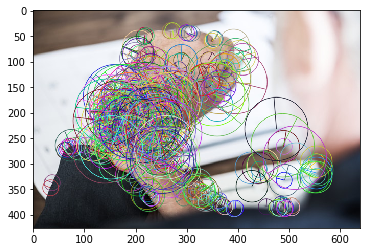

In [15]:
train_gray = cv2.cvtColor(train_img, cv2.COLOR_RGB2GRAY)
query_gray = cv2.cvtColor(query_img, cv2.COLOR_RGB2GRAY)

orb = cv2.ORB_create(5000, 2.0)

keypoints_train, descriptors_train = orb.detectAndCompute(train_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

query_img_keyp = copy.copy(query_img)

cv2.drawKeypoints(query_img, keypoints_query, query_img_keyp, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(query_img_keyp)
plt.show()

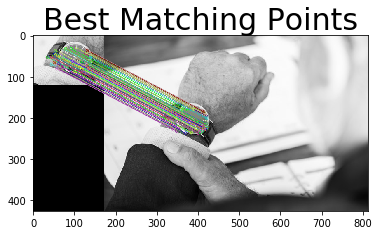

In [16]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = bf.match(descriptors_train, descriptors_query)

matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(train_gray, keypoints_train, query_gray, keypoints_query, matches[:85], query_gray, flags = 2)

plt.title('Best Matching Points', fontsize = 30)
plt.imshow(result)
plt.show()